# **Capstone Project**

---

## License & Disclaimer

**Author:** Abigail de Guzman

**Course:** Post Graduate Diploma in AI and Machine Learning  

**Institution:** AIM School of Executive Education and Lifelong Learning  

This notebook was created as part of academic requirements. All content— including code, methods, and explanations— is intended solely for educational purposes.

Unauthorized reproduction, distribution, or modification— whether in part or in full—is not permitted without prior written consent.  

### Disclaimer

The content is provided **“as is”**, without any warranties of any kind. The author shall not be liable for any loss or damage arising from the use of this material.

By accessing or using this notebook, you agree to these terms.

---

# **Capstone Project Step 1:** Problem Understanding & Framing

## **Business Context**
Credit card fraud poses significant financial and reputational risks to financial institutions. Given the high volume of daily transactions, manual review is impractical, making automated fraud detection systems essential for identifying potentially fraudulent activity in a timely manner.

## **Data Science Problem**
The objective of this project is to develop a machine learning model that can accurately identify fraudulent credit card transactions based on historical transaction data. This problem is framed as a **binary classification task**, where each transaction is classified as either fraudulent (1) or non-fraudulent (0).

## **Evaluation Metrics & Success Criteria**
Due to the highly imbalanced nature of credit card fraud data, traditional accuracy is insufficient as a standalone performance metric. Model evaluation therefore focuses on **ROC-AUC** to measure overall discriminative ability, complemented by **Precision–Recall analysis** to assess the trade-off between detecting fraudulent transactions (recall) and minimizing false positives (precision).

## **Business KPIs**
From a business perspective, success is measured by the model’s ability to maximize fraud detection rates while minimizing false positives that may inconvenience legitimate customers. The model should support risk-based decision-making and allow for configurable classification thresholds based on an organization’s tolerance for fraud losses versus customer friction.


# **Data Preprocessing**

In [2]:
# Import Libraries for Data Analysis and Modeling

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix
)

In [3]:
# Data Upload and Exploration
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/creditcard.csv'

In [5]:
# Load Credit Card dataset
df = pd.read_csv('/content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

# **Dataset Overview**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Data Dictionary**

The dataset used in this project is the publicly available **Credit Card Fraud Dataset** released by the Machine Learning Group of Université Libre de Bruxelles. The data contains anonymized credit card transactions made by European cardholders in September 2013.

| Feature | Data Type | Description |
|-------|-----------|-------------|
| Time | float | Number of seconds elapsed between a given transaction and the first transaction in the dataset |
| V1–V28 | float | Anonymized numerical features obtained via Principal Component Analysis (PCA) to protect sensitive transaction information |
| Amount | float | Transaction amount in euros |
| Class | int | Target variable indicating whether a transaction is fraudulent (1) or non-fraudulent (0) |

Due to confidentiality constraints, the original transaction attributes are not available, and only the transformed PCA components are provided. As a result, feature interpretation focuses on relative importance and model behavior rather than semantic meaning.


# **Data Quality Checks**

In [10]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


The dataset was checked for missing values across all features, and no missing observations were found. As a result, no imputation or removal of records was required prior to model training.

# **Target Variable Distribution**

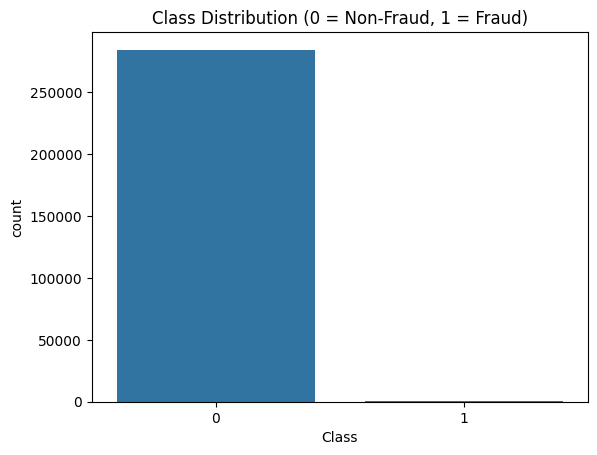

,proportion
Class,
0,0.998273
1,0.001727


In [11]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

df["Class"].value_counts(normalize=True)


The target variable exhibits a severe class imbalance, with fraudulent transactions accounting for approximately 0.17% of all observations. This imbalance reflects real-world fraud detection scenarios, where the vast majority of transactions are legitimate. In such settings, conventional accuracy-based evaluation is misleading, as a model can achieve high accuracy by predicting all transactions as non-fraudulent. To address this, model evaluation and training strategies in later stages emphasize imbalance-aware metrics and techniques, including ROC-AUC, Precision–Recall analysis, and class-weighted learning.

# **Feature Distributions**

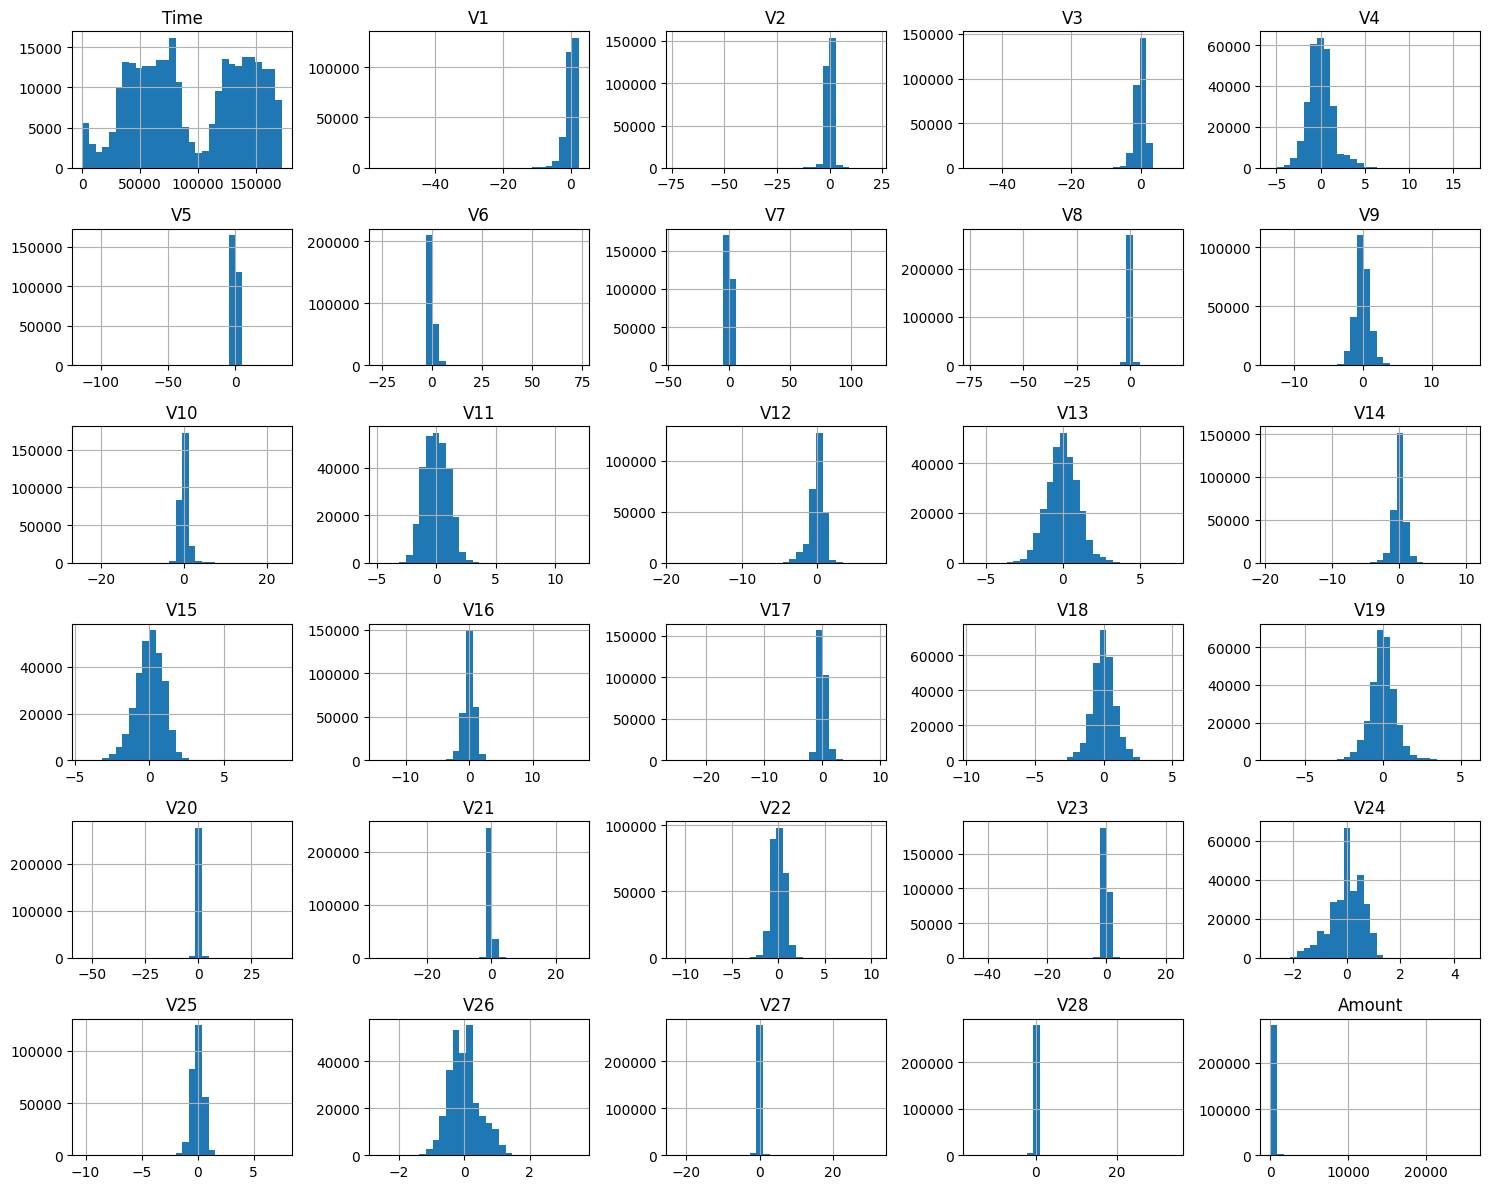

In [12]:
df.drop(columns=["Class"]).hist(
    figsize=(15, 12),
    bins=30
)
plt.tight_layout()
plt.show()


The feature distributions show that most input variables are centered around zero and exhibit varying degrees of skewness, reflecting the use of PCA-transformed features (V1–V28). These transformed features generally follow approximately symmetric distributions, while the original variables, particularly **Amount** and **Time**, display noticeable skew. As a result, feature scaling is applied prior to model training to ensure consistent treatment of variables with different scales.


# **Train–Test Split and Preprocessing**

To evaluate model performance on unseen data, the dataset was partitioned into training and test sets using a stratified split. Stratification ensures that the severe class imbalance observed in the target variable is preserved across both subsets.

In [13]:
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


An 80/20 train–test split was used, with a fixed random seed to ensure reproducibility of results.

# **Feature Scaling**


Feature scaling was applied to standardize the input variables prior to model training. Since the dataset contains features with different magnitudes (particularly the original `Time` and `Amount` variables), standardization ensures that all features contribute proportionally during optimization, which is especially important for distance-based and gradient-based models.

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The `Time` feature was retained to preserve temporal transaction patterns. In a production setting, this variable may be further engineered into cyclical or window-based features to better capture periodic transaction behavior.

# **Model 1: Logistic Regression**

Logistic Regression was used as a baseline model due to its simplicity, interpretability, and common use in binary classification tasks. To address the severe class imbalance in the dataset, class weighting was applied to penalize misclassification of fraudulent transactions more heavily during training.

In [15]:
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC: 0.9720834996210077


The baseline model achieves strong overall discrimination as indicated by ROC-AUC, but exhibits low precision for the fraud class, reflecting the expected trade-off between fraud detection and false positives in highly imbalanced data.

# **Model 2: Random Forest**

Random Forest was selected as a second model to capture non-linear relationships and feature interactions that may not be well represented by a linear baseline. To mitigate overfitting given the extreme class imbalance, the model was constrained through depth and leaf-size parameters, and class weighting was applied to emphasize correct identification of fraudulent transactions.

In [16]:
rf = RandomForestClassifier(
    n_estimators=30,        # ↓ from 100
    max_depth=10,           # caps tree complexity
    min_samples_leaf=50,    # prevents overfitting
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.87      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9764099699390165


Compared to the Logistic Regression baseline, the Random Forest model achieves a modest improvement in overall discrimination and substantially higher precision for the fraud class. This indicates a better balance between detecting fraudulent transactions and reducing false positives, making the model more suitable for practical fraud detection scenarios.

# **Model Comparison Table**

The performance of the baseline Logistic Regression model and the Random Forest model was compared using ROC-AUC to evaluate their overall discriminative ability under severe class imbalance.

In [17]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "ROC AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf)
    ]
})

results


,Model,ROC AUC
0,Logistic Regression,0.972083
1,Random Forest,0.976410


The Random Forest model outperforms the Logistic Regression baseline, achieving a higher ROC-AUC and substantially improved precision for the fraud class. This suggests that the Random Forest better captures complex, non-linear patterns in the data while reducing false positives, making it more suitable for practical fraud detection scenarios.

# **Precision–Recall Curve**

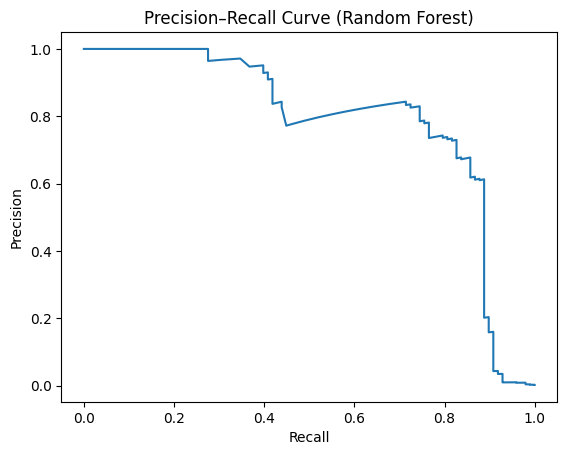

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Random Forest)")
plt.show()


The precision–recall curve illustrates the trade-off between identifying fraudulent transactions and minimizing false positives in a highly imbalanced setting. As recall increases, precision declines, reflecting the rising cost of incorrectly flagging legitimate transactions as fraud. This analysis underscores the importance of threshold selection when deploying the model in production, depending on the acceptable balance between fraud detection performance and operational burden.

# **Model Explainability (SHAP)**

To improve interpretability and provide insight into the model’s decision-making process, SHAP (SHapley Additive exPlanations) was applied to the trained model. SHAP values quantify the contribution of each feature to individual predictions, enabling analysis of which variables most strongly influence fraud classification.


In [19]:
# Install SHAP and import SHAP to support model explainability analysis

!pip install shap

In [20]:
import shap

# Used a small background sample for speed
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 1000, replace=False)]

## **SHAP Explainer Setup**


In [21]:
explainer = shap.LinearExplainer(lr, background)
shap_values = explainer.shap_values(X_test_scaled)


## **SHAP summary plot**

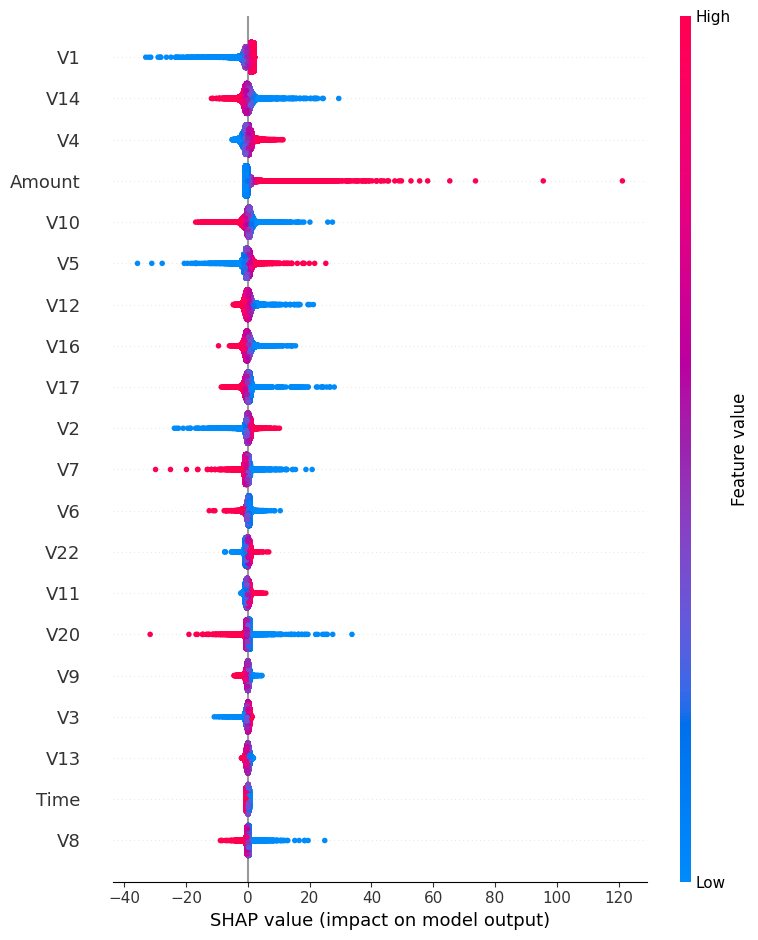

In [22]:
shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=X.columns,
    show=True
)


The SHAP summary plot visualizes the global impact of each feature on the model’s predictions. Features are ranked by their average absolute SHAP value, indicating their overall importance in driving fraud classification.

Higher SHAP values (shown in red) correspond to feature values that increase the likelihood of a transaction being classified as fraudulent, while lower values (blue) decrease the predicted fraud risk. Due to feature anonymization via PCA, the analysis focuses on relative importance and directional influence rather than semantic interpretation of individual variables.


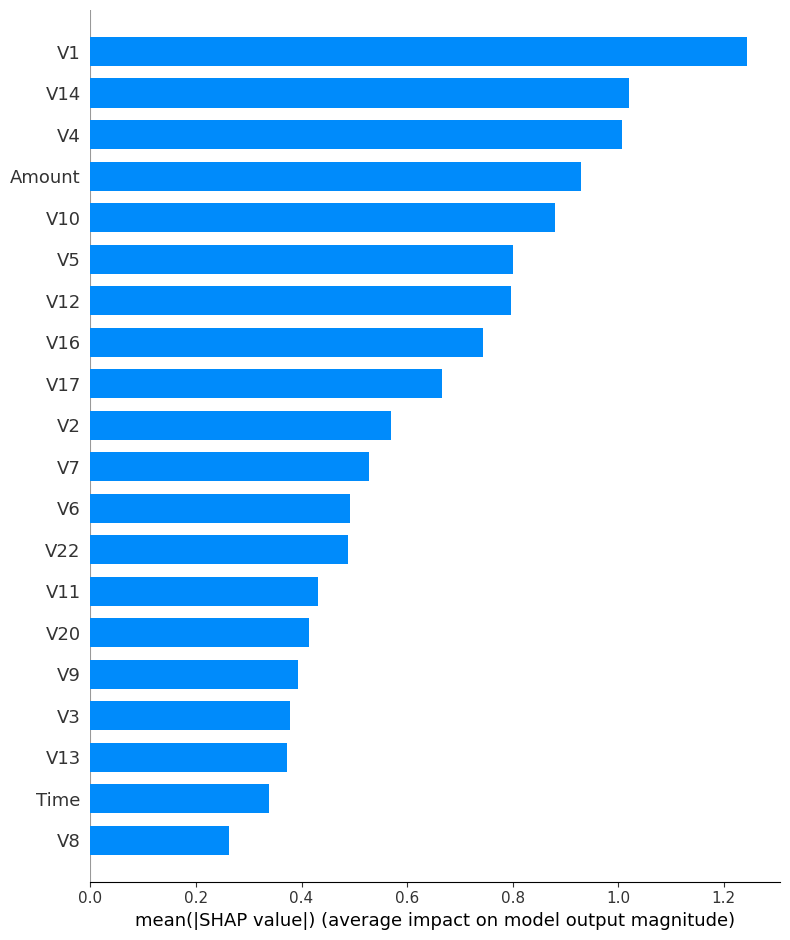

In [23]:
shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=X.columns,
    plot_type="bar",
    show=True
)


The bar plot aggregates SHAP values across all observations to highlight the most influential features in the model. Variables such as V1, V4, V14, and Amount emerge as the strongest contributors to fraud predictions, indicating that both transformed behavioral signals and transaction magnitude play a role in identifying suspicious activity.


Overall, SHAP analysis enhances model transparency by revealing which features consistently influence fraud predictions. While individual feature semantics are obscured due to PCA-based anonymization, the explainability results provide confidence that the model relies on meaningful transaction patterns rather than spurious correlations. This level of interpretability is critical for risk-sensitive domains such as financial fraud detection.


# **Bias Analysis: Transaction Amount as a Proxy**


To assess whether model errors disproportionately affect transactions of different monetary values, transaction amount was used as a proxy variable for bias analysis. While transaction amount is not a protected attribute, it can reveal potential operational bias, such as whether high-value or low-value transactions are more likely to be incorrectly flagged as fraudulent.

In [24]:
# Create amount buckets
df_test = X_test.copy()
df_test["Actual"] = y_test.values
df_test["Predicted"] = y_pred_rf
df_test["Amount"] = df.loc[X_test.index, "Amount"]

df_test["Amount_Bucket"] = pd.qcut(
    df_test["Amount"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# False positive rate by bucket
bias_summary = df_test.groupby("Amount_Bucket").apply(
    lambda x: ((x["Predicted"] == 1) & (x["Actual"] == 0)).mean()
)

bias_summary

/tmp/ipython-input-585588598.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bias_summary = df_test.groupby("Amount_Bucket").apply(
/tmp/ipython-input-585588598.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_summary = df_test.groupby("Amount_Bucket").apply(


,0
Amount_Bucket,
Low,0.001825
Medium,0.000280
High,0.000493
Very High,0.001124


The table reports the false positive rate within each transaction amount bucket. False positives are defined as legitimate transactions incorrectly classified as fraud. Lower false positive rates indicate reduced customer friction for transactions within that amount range.

# **Chart 1:** False Positive Rate by Amount Bucket

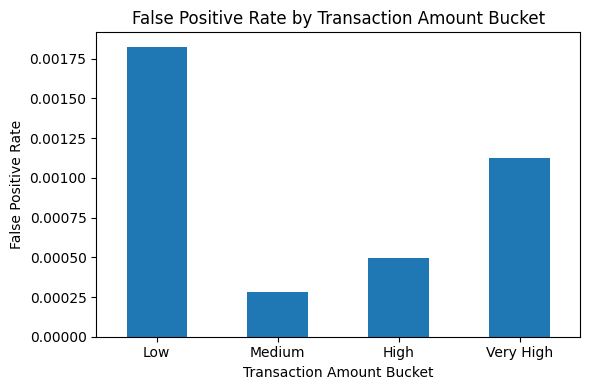

In [25]:
bias_summary.plot(
    kind="bar",
    figsize=(6, 4)
)
plt.ylabel("False Positive Rate")
plt.xlabel("Transaction Amount Bucket")
plt.title("False Positive Rate by Transaction Amount Bucket")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The false positive rate varies across transaction amount buckets, with the highest rate observed in the lowest and very high transaction ranges. This suggests that the model is more conservative when evaluating unusually small or unusually large transactions, potentially reflecting their higher perceived risk profiles. While this behavior may be operationally justified, it also highlights areas where customer friction could increase.

# **Chart 2:** Fraud Rate by Amount Bucket

/tmp/ipython-input-2226202152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df_test.groupby("Amount_Bucket")["Actual"].mean()


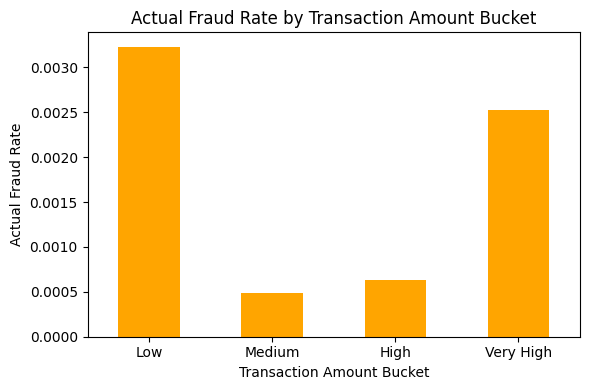

In [26]:
fraud_rate = df_test.groupby("Amount_Bucket")["Actual"].mean()

fraud_rate.plot(
    kind="bar",
    figsize=(6, 4),
    color="orange"
)
plt.ylabel("Actual Fraud Rate")
plt.xlabel("Transaction Amount Bucket")
plt.title("Actual Fraud Rate by Transaction Amount Bucket")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The actual fraud rate by transaction amount bucket shows that fraudulent activity is more prevalent in low and very high transaction ranges. This partially aligns with the observed false positive patterns, indicating that the model’s behavior is influenced by underlying risk distribution rather than arbitrary thresholds.


Overall, this proxy-based bias analysis suggests that the model’s error patterns broadly reflect the underlying fraud distribution across transaction amounts. However, the elevated false positive rates at the extremes indicate opportunities for refinement, such as amount-specific thresholds or differentiated review workflows. In a production setting, such adjustments could help balance fraud prevention effectiveness with customer experience.


*End of Notebook*

*End of Notebook*

*End of Notebook*

In [29]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

In [30]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/de-Guzman_Abigail_Capstone-Project-cc.ipynb'


[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/de-Guzman_Abigail_Capstone-Project-cc.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions

In [31]:
from google.colab import files
files.download('/content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/de-Guzman_Abigail_Capstone-Project-cc.pdf')


FileNotFoundError: Cannot find file: /content/drive/MyDrive/AIM - PGD AI and ML/Capstone Project/de-Guzman_Abigail_Capstone-Project-cc.pdf